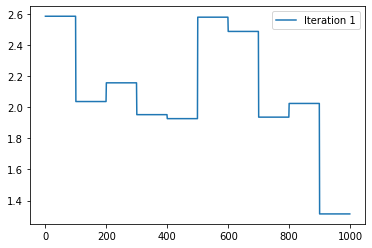

In [3]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# define the number of qubits and the depth of the quantum circuit
num_qubits = 4
depth = 2

# define the quantum circuit
dev = qml.device('default.qubit', wires=num_qubits)
@qml.qnode(dev)
def quantum_circuit(params):
    for i in range(depth):
        for j in range(num_qubits):
            qml.RY(params[i, j], wires=j)
            qml.RX(params[i, j + num_qubits], wires=j)
    return qml.probs(wires=range(num_qubits))

# define the classical neural network
def classical_nn(params):
    probs = quantum_circuit(params[0])
    for i in range(1, 5):
        probs = quantum_circuit(params[i])
    return probs

# define the von Neumann entropy function
def von_neumann_entropy(probs):
    entropy = -sum([p * np.log(p) for p in probs])
    return entropy

# define the cost function
def cost(params):
    entropies = []
    for i in range(5):
        probs = quantum_circuit(params[i])
        entropies.append(von_neumann_entropy(probs))
    return entropies

# define the optimization algorithm
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# initialize a list to store the entropies at each optimization step
entropies = []

# run the optimization 10 times
for iter_num in range(10):
    # set the initial parameters
    params = [np.random.uniform(0, 2*np.pi, (depth, 2*num_qubits)) for i in range(5)]

    # optimize the cost function
    for i in range(100):
        params = opt.step(cost, params)
        entropies.append(cost(params)[0])

# plot the entropies of each hidden layer as a function of the optimization steps
plt.plot(entropies)
plt.legend(['Iteration {}'.format(i+1) for i in range(10)])
plt.show()



In [ ]:
import pennylane as qml
from pennylane import numpy as np

# define the quantum circuit
def quantum_circuit(weights):
    qml.RZ(weights[0], wires=0)
    qml.RY(weights[1], wires=0)
    qml.RX(weights[2], wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(weights[3], wires=1)
    qml.RZ(weights[4], wires=1)

# define the quantum neural network
def quantum_neural_network(weights, x=None):
    quantum_circuit(weights)
    return qml.expval(qml.PauliZ(1))

# define the quantum node
def quantum_node(inputs, weights):
    return quantum_neural_network(weights, inputs)

# define the quantum layer
def quantum_layer(inputs, weights):
    layer = [quantum_node(inputs, weights[i]) for i in range(len(weights))]
    return layer

# define the quantum model
def quantum_model(inputs, weights):
    hidden_layers = [quantum_layer(inputs, weights[i]) for i in range(len(weights))]
    return hidden_layers

# define the quantum state
def quantum_state(inputs, weights):
    qml.set_shapes(weights=weights)
    return qml.QubitStateVector(quantum_model(inputs, weights))

# define the quantum entropy
def quantum_entropy(inputs, weights):
    qml.set_shapes(weights=weights)
    quantum_state = qml.QubitStateVector(quantum_model(inputs, weights))
    return qml.von_neumann_entropy(quantum_state)

# set the number of qubits and hidden layers
num_qubits = 2
num_hidden_layers = 2

# set the number of weights in each hidden layer
num_weights_hidden_layer = [3, 5]

# set the weights for the quantum neural network
weights = []
for i in range(num_hidden_layers):
    weights.append(np.random.normal(0, np.pi, (1, num_weights_hidden_layer[i])))
weights = np.concatenate(weights, axis=1)

# set the inputs
inputs = np.random.normal(0, np.pi, (1, num_qubits))

# calculate the entropies in the hidden layers

def quantum_entropy(inputs, weights):
    """Calculates the entropy of the quantum state at each hidden layer.
    
    Args:
        inputs (array): Inputs to the quantum neural network.
        weights (array): Weights for each hidden layer.
        
    Returns:
        list: Entropy of the quantum state at each hidden layer.
    """
    # initialize a list to store the entropies
    entropies = []
    
    # iterate over each hidden layer
    for i in range(len(weights)):
        # set the weights for the current hidden layer
        qml.set_parameters(weights[i])
        # calculate the quantum state for the current hidden layer
        quantum_state = qml.QubitStateVector(quantum_model(inputs, weights[i]))
        # calculate the entropy of the quantum state
        entropy = qml.von_neumann_entropy(quantum_state)
        # append the entropy to the list
        entropies.append(entropy)
    
    return entropies

entropies = quantum_entropy(inputs, weights)

print("Entropies in hidden layers:", entropies)
